### This is a project on Iris dataset classification that makes predictions on the class or species of the data using DecisionTree machine learning model 

In [30]:
# Loading the dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
# Importing visualizing packages
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus, graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from io import StringIO

In [31]:
# Loading the Iris dataset
iris = pd.read_csv("iris.csv")

In [32]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [33]:
# Checking for infromation about the iris dataset
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [34]:
!pip install graphviz

In [35]:
# Checking for empty column features
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [36]:
# Size of the dataset
iris.shape

(150, 5)

### Data Exploratory Analysis

In [37]:
classes = iris['species'].unique().tolist() # Produces the list of the classes of the iris dataset

In [38]:
classes

['setosa', 'versicolor', 'virginica']

In [39]:
# Grouping by the mean of the classes
iris.groupby(['species']).mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.418,1.464,0.244
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


### Model building and Evaluation

In [40]:
# Putting featues variables to X
X = iris.drop(['species'], axis = 1)

# Storing the classes variable into y
y = iris['species']

In [41]:
print(X)

     sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]


In [42]:
print(y)

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object


### Splitting Data into Train_Test_Split

In [43]:
x_train, x_test, y_train, y_test = train_test_split(X, y,  test_size = 0.3, random_state = 100)

In [44]:
x_train.head(10)

,sepal_length,sepal_width,petal_length,petal_width
6,4.6,3.4,1.4,0.3
25,5.0,3.0,1.6,0.2
21,5.1,3.7,1.5,0.4
92,5.8,2.6,4.0,1.2
9,4.9,3.1,1.5,0.1
23,5.1,3.3,1.7,0.5
35,5.0,3.2,1.2,0.2
54,6.5,2.8,4.6,1.5
131,7.9,3.8,6.4,2.0
127,6.1,3.0,4.9,1.8


### Creating the classifier for DecisionTree

In [45]:
Model_tree = DecisionTreeClassifier()

In [46]:
Model_tree.fit(x_train, y_train)

DecisionTreeClassifier()

### Making Predictions on Training set


In [47]:
y_pred_train = Model_tree.predict(x_train)

In [48]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        34
  versicolor       1.00      1.00      1.00        39
   virginica       1.00      1.00      1.00        32

    accuracy                           1.00       105
   macro avg       1.00      1.00      1.00       105
weighted avg       1.00      1.00      1.00       105



In [49]:
# Determing the confusion matrix and accuracy score

In [50]:
# Determining the accuracy score: 
train_accuracy = accuracy_score(y_train, y_pred_train)
print(train_accuracy)

1.0


In [51]:
# Determining the confusion matrix
Conf_train = confusion_matrix(y_train, y_pred_train)
print(Conf_train)

[[34  0  0]
 [ 0 39  0]
 [ 0  0 32]]


### Making predictions on the Test dataset

In [52]:
y_test_pred = Model_tree.predict(x_test)

In [53]:
test_accuracy = accuracy_score(y_test, y_test_pred)


In [54]:
print(test_accuracy)

0.9555555555555556


In [55]:
# Classification report for the test dataset
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       0.91      0.91      0.91        11
   virginica       0.94      0.94      0.94        18

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



### Vislualization of the DecisionTree

In [56]:
features = list(x_train.columns)

In [57]:
features

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [59]:
"""features = list(x_train.columns)
dot_data = StringIO()
export_graphviz(Model_tree, out_file = dot_data, feature_names = features, filled = True, rounded = True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())"""

'features = list(x_train.columns)\ndot_data = StringIO()\nexport_graphviz(Model_tree, out_file = dot_data, feature_names = features, filled = True, rounded = True)\ngraph = pydotplus.graph_from_dot_data(dot_data.getvalue())\nImage(graph.create_png())'

### Hyperparameter Tunning using GridSearchCV and K-Fold Cross Validation

In [60]:
# Finding the Best_Optimum max-depth

In [62]:
# GridSearchCV to find the Optimal max_depth: Number of levels
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# Specify the number of kfolds
n_folds = 5

parameter = {'max_depth': range(1,10)}

# Initiating an instance of the model
Dtree = DecisionTreeClassifier(criterion = "gini", random_state =100) # Initialization of the DecisionTreeClassifier
tree = GridSearchCV(Dtree, parameter, cv = n_folds, scoring = "accuracy", return_train_score = True)
tree.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'max_depth': range(1, 10)}, return_train_score=True,
             scoring='accuracy')

In [68]:
# Scores of GridSearchCV
scores = tree.cv_results_
res = pd.DataFrame(scores)
res.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.007413,0.002012,0.005507,0.001968,1,{'max_depth': 1},0.714286,0.714286,0.714286,0.666667,...,0.695238,0.023328,9,0.690476,0.690476,0.690476,0.702381,0.702381,0.695238,0.005832
1,0.004950,0.001243,0.003919,0.000883,2,{'max_depth': 2},0.952381,0.904762,0.857143,1.000000,...,0.942857,0.055533,8,0.964286,0.976190,0.964286,0.952381,0.952381,0.961905,0.008909
2,0.006203,0.000902,0.004530,0.001235,3,{'max_depth': 3},0.952381,0.952381,0.857143,1.000000,...,0.952381,0.052164,7,0.988095,0.988095,0.964286,0.976190,0.976190,0.978571,0.008909
3,0.005949,0.000688,0.004189,0.000718,4,{'max_depth': 4},0.952381,0.952381,0.952381,1.000000,...,0.971429,0.023328,1,1.000000,1.000000,0.988095,1.000000,1.000000,0.997619,0.004762
4,0.005491,0.000813,0.004603,0.000814,5,{'max_depth': 5},0.952381,0.952381,0.952381,1.000000,...,0.971429,0.023328,1,1.000000,1.000000,0.988095,1.000000,1.000000,0.997619,0.004762


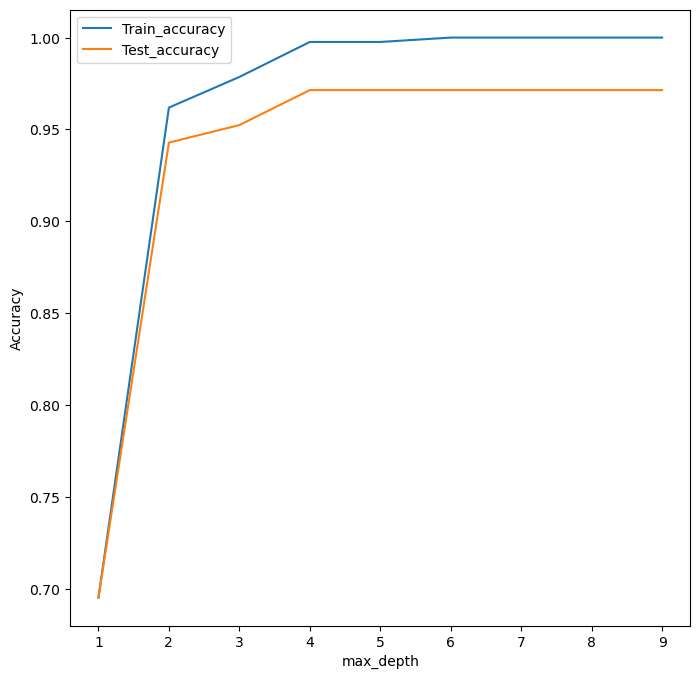

In [73]:
# Plotting accuracies with max_depth
plt.figure(figsize = (8,8))
plt.plot(res["param_max_depth"], res["mean_train_score"], label = "Train_accuracy")
plt.plot(res["param_max_depth"], res["mean_test_score"], label = "Test_accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Tunning for min_samples_leaf

In [74]:
# GridSearchCV to find the Optimal max_depth: Number of levels
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# Specify the number of kfolds
n_folds = 5

parameter = {'min_samples_leaf': range(1,40, 3)}

# Initiating an instance of the model
Dtree = DecisionTreeClassifier(criterion = "gini", random_state =100) # Initialization of the DecisionTreeClassifier
tree = GridSearchCV(Dtree, parameter, cv = n_folds, scoring = "accuracy", return_train_score = True)
tree.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'min_samples_leaf': range(1, 40, 3)},
             return_train_score=True, scoring='accuracy')

In [75]:
# Results of the GridSearch_CV
scores = tree.cv_results_
res_leaf = pd.DataFrame(scores)

In [77]:
res_leaf.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.005242,0.001448,0.003016,0.000651,1,{'min_samples_leaf': 1},0.952381,0.952381,0.952381,1.0,...,0.971429,0.023328,1,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,0.000000
1,0.004331,0.001504,0.003687,0.002001,4,{'min_samples_leaf': 4},0.952381,0.904762,0.857143,1.0,...,0.942857,0.055533,2,0.988095,0.97619,0.964286,0.976190,0.976190,0.976190,0.007529
2,0.002972,0.000265,0.002311,0.000777,7,{'min_samples_leaf': 7},0.952381,0.904762,0.857143,1.0,...,0.942857,0.055533,2,0.964286,0.97619,0.964286,0.952381,0.952381,0.961905,0.008909
3,0.002932,0.000624,0.001632,0.000616,10,{'min_samples_leaf': 10},0.952381,0.904762,0.857143,1.0,...,0.942857,0.055533,2,0.964286,0.97619,0.964286,0.952381,0.952381,0.961905,0.008909
4,0.003104,0.001044,0.002811,0.001365,13,{'min_samples_leaf': 13},0.952381,0.904762,0.857143,1.0,...,0.942857,0.055533,2,0.964286,0.97619,0.964286,0.952381,0.952381,0.961905,0.008909


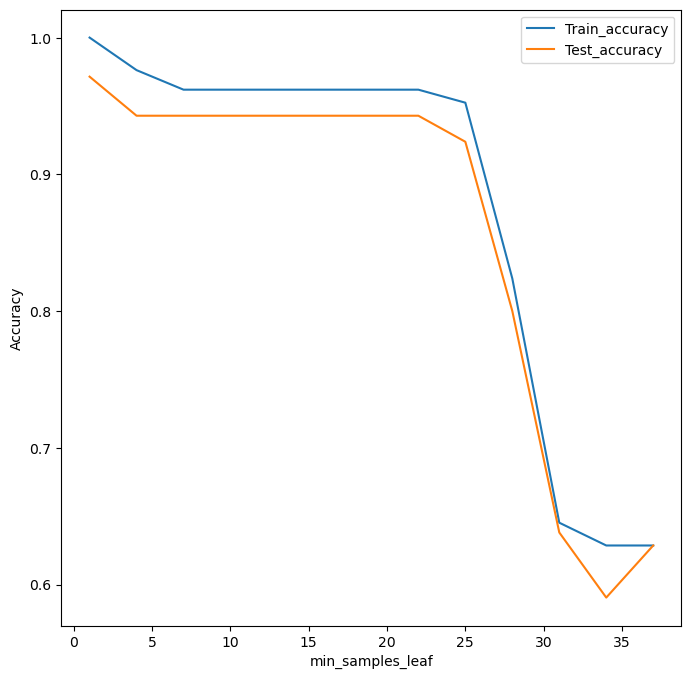

In [79]:
plt.figure(figsize = (8,8))
plt.plot(res_leaf["param_min_samples_leaf"], res_leaf["mean_train_score"], label = "Train_accuracy")
plt.plot(res_leaf["param_min_samples_leaf"], res_leaf["mean_test_score"], label = "Test_accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [91]:
# Grid Search to find the Optimal Parameters
param_grid = {'max_depth': range(1,10), 'min_samples_leaf': range(1,40, 2), 'min_samples_split': range(2,30,2),
              'criterion': ['entropy', 'gini']}

n_folds = 5

iris_tree = DecisionTreeClassifier() # Initialization of the DecisionTreeClassifier
grid_search = GridSearchCV(estimator = iris_tree, cv = n_folds, param_grid = param_grid, verbose = 1)
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 5040 candidates, totalling 25200 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 40, 2),
                         'min_samples_split': range(2, 30, 2)},
             verbose=1)

In [92]:
# CV Results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.006231,0.000584,0.004537,0.001304,entropy,1,1,2,"{'criterion': 'entropy', 'max_depth': 1, 'min_...",0.714286,0.714286,0.714286,0.666667,0.666667,0.695238,0.023328,3137
1,0.005278,0.001125,0.005114,0.001087,entropy,1,1,4,"{'criterion': 'entropy', 'max_depth': 1, 'min_...",0.714286,0.714286,0.714286,0.666667,0.666667,0.695238,0.023328,3137
2,0.004727,0.001389,0.005016,0.002347,entropy,1,1,6,"{'criterion': 'entropy', 'max_depth': 1, 'min_...",0.714286,0.714286,0.714286,0.666667,0.666667,0.695238,0.023328,3137
3,0.005958,0.001144,0.004202,0.001226,entropy,1,1,8,"{'criterion': 'entropy', 'max_depth': 1, 'min_...",0.714286,0.714286,0.714286,0.666667,0.666667,0.695238,0.023328,3137
4,0.004849,0.000755,0.003935,0.000812,entropy,1,1,10,"{'criterion': 'entropy', 'max_depth': 1, 'min_...",0.714286,0.714286,0.714286,0.666667,0.666667,0.695238,0.023328,3137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5035,0.004115,0.000632,0.003629,0.000539,gini,9,39,20,"{'criterion': 'gini', 'max_depth': 9, 'min_sam...",0.619048,0.619048,0.619048,0.666667,0.619048,0.628571,0.019048,3973
5036,0.003659,0.000477,0.003650,0.000851,gini,9,39,22,"{'criterion': 'gini', 'max_depth': 9, 'min_sam...",0.619048,0.619048,0.619048,0.666667,0.619048,0.628571,0.019048,3973
5037,0.004722,0.000499,0.003322,0.000950,gini,9,39,24,"{'criterion': 'gini', 'max_depth': 9, 'min_sam...",0.619048,0.619048,0.619048,0.666667,0.619048,0.628571,0.019048,3973
5038,0.003996,0.000488,0.003075,0.000682,gini,9,39,26,"{'criterion': 'gini', 'max_depth': 9, 'min_sam...",0.619048,0.619048,0.619048,0.666667,0.619048,0.628571,0.019048,3973


In [95]:
# Printing the optimal accuracy score and hyperparameters
print("best_accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best_accuracy 0.980952380952381
DecisionTreeClassifier(criterion='entropy', max_depth=6)


### Running model with best hyperparamters

In [97]:
iris_tree1 = DecisionTreeClassifier(criterion = 'entropy', max_depth = 6)
iris_tree1.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6)

In [98]:
iris_tree1.score(x_test, y_test)

0.9555555555555556

In [100]:
# Making predictions on the new model
y_pred = iris_tree1.predict(x_test)
print(accuracy_score(y_test, y_pred))

0.9555555555555556


In [101]:
# Determination of the classification_report of the analysis after hyperparameter tunning
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       0.91      0.91      0.91        11
   virginica       0.94      0.94      0.94        18

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



In [102]:
# Determination of the  confusion matrix
print(confusion_matrix(y_test, y_pred))

[[16  0  0]
 [ 0 10  1]
 [ 0  1 17]]
